In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

import pandasql as psql

In [2]:
# Load the weather dataset

weather = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\49 season 29-jul-2021\weather.csv", header=0)
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
# Display the dataset information

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [4]:
# Identify the missing data

weather.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
# Functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))
    
# functions for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<AxesSubplot:>

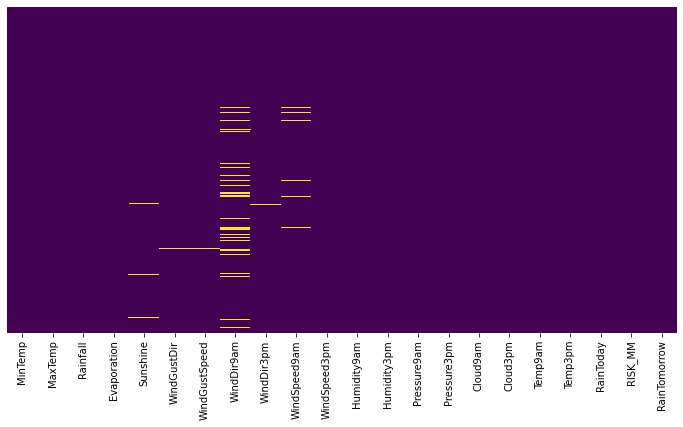

In [6]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(weather.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [7]:
# Use KNNImputer to address missing values

from sklearn.impute import KNNImputer

imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
                        copy = True, add_indicator=False)
weather['Sunshine'] = imputer_int.fit_transform(weather[['Sunshine']])

In [8]:
weather.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [9]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                           copy=True, add_indicator=False)

weather['WindGustDir'] = imputer_str.fit_transform(weather[['WindGustDir']])
weather['WindGustSpeed'] = imputer_str.fit_transform(weather[['WindGustSpeed']])
weather['WindDir9am'] = imputer_str.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = imputer_str.fit_transform(weather[['WindDir3pm']])
weather['WindSpeed9am'] = imputer_str.fit_transform(weather[['WindSpeed9am']])


<AxesSubplot:>

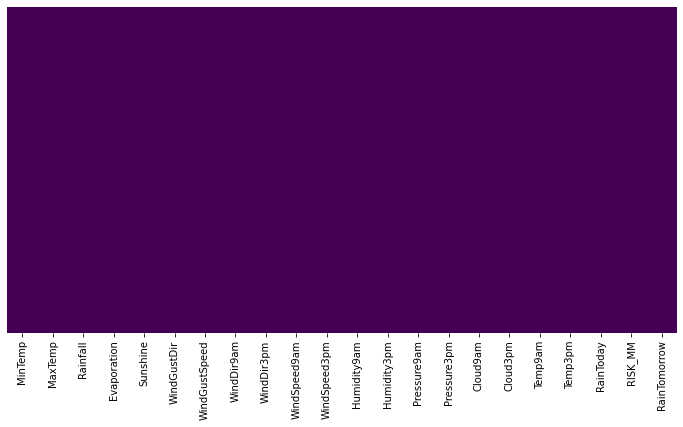

In [10]:
# Check the Visulize of missing data in graph

resizeplot()
sns.heatmap(weather.isnull(), yticklabels=False,cmap='viridis', cbar=False)

In [11]:
# Drop the RISK_MM variable

weather.drop('RISK_MM', inplace=True, axis=1)
weather.head().T

,0,1,2,3,4
MinTemp,8.0,14.0,13.7,13.3,7.6
MaxTemp,24.3,26.9,23.4,15.5,16.1
Rainfall,0.0,3.6,3.6,39.8,2.8
Evaporation,3.4,4.4,5.8,7.2,5.6
Sunshine,6.3,9.7,3.3,9.1,10.6
WindGustDir,NW,ENE,NW,NW,SSE
WindGustSpeed,30.0,39.0,85.0,54.0,50.0
WindDir9am,SW,E,N,WNW,SSE
WindDir3pm,NW,W,NNE,W,ESE
WindSpeed9am,6.0,4.0,6.0,30.0,20.0


In [12]:
# "groupby" we have important information about the possible conditions that may or may not cause rain condition

weather[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
         'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
         'Temp3pm']].groupby(weather['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.690000,8.61,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.00,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [13]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

weather['WindGustDir'] = LB.fit_transform(weather[['WindGustDir']])
weather['WindDir9am'] = LB.fit_transform(weather[['WindDir9am']])
weather['WindDir3pm'] = LB.fit_transform(weather[['WindDir3pm']])

In [14]:
# Use LabelEncoder for target variables 

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

weather['RainToday'] = LB.fit_transform(weather[['RainToday']])
weather['RainTomorrow'] = LB.fit_transform(weather[['RainTomorrow']])

In [15]:
weather.head().T

,0,1,2,3,4
MinTemp,8.0,14.0,13.7,13.3,7.6
MaxTemp,24.3,26.9,23.4,15.5,16.1
Rainfall,0.0,3.6,3.6,39.8,2.8
Evaporation,3.4,4.4,5.8,7.2,5.6
Sunshine,6.3,9.7,3.3,9.1,10.6
WindGustDir,0.0,0.0,0.0,0.0,0.0
WindGustSpeed,30.0,39.0,85.0,54.0,50.0
WindDir9am,0.0,1.0,0.0,0.0,0.0
WindDir3pm,0.0,0.0,0.0,0.0,0.0
WindSpeed9am,6.0,4.0,6.0,30.0,20.0


In [16]:
# Identify the dependent and Target variable

IndepVar = []
for col in weather.columns:
    if col != 'RainTomorrow':
        IndepVar.append(col)
        
TargetVar = 'RainTomorrow'

x = weather[IndepVar]
y = weather[TargetVar]

In [17]:
# Split the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6)
x_test_F1 = x_test.copy()

In [20]:
# Scaling the features by using MINMAXScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# SVC Algorithm - Gaussian Kernel

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        91
           1       0.90      0.47      0.62        19

    accuracy                           0.90       110
   macro avg       0.90      0.73      0.78       110
weighted avg       0.90      0.90      0.89       110

[[90  1]
 [10  9]]
Accuracy: 90.0 %
Precision: 90.0 %
Recall: 90.0 %
f1-score: 90.0 %
roc_auc_score: 0.731


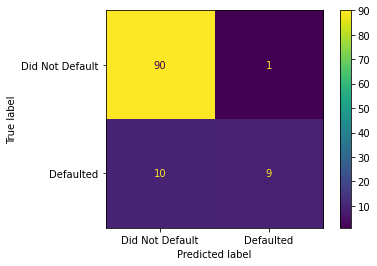

In [25]:
# Train the SVM algorithm with data and build the model

from sklearn.svm import SVC

modelSVMGaussian = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=True, 
                        tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, 
                        random_state=None)
modelSVMGaussian.fit(x_train, y_train)

# Predict the model by using test dataset

y1_pred = modelSVMGaussian.predict(x_test)

# Display Confusion matrix and Classification report

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y1_pred))
print(confusion_matrix(y_test, y1_pred))

# Evalution of performance of the model

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", round(metrics.accuracy_score(y_test, y1_pred) *100, 2), "%")
print("Precision:", round(metrics.precision_score(y_test, y1_pred, average='micro') *100, 2), "%")
print("Recall:", round(metrics.recall_score(y_test, y1_pred, average='micro') *100, 2), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y1_pred, average='micro') * 100, 2)), '%')
print("roc_auc_score:", round(metrics.roc_auc_score(y_test, y1_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelSVMGaussian, x_test, y_test, values_format='d',
                     display_labels=['Did Not Default', 'Defaulted'])

In [26]:
# Results - predict vs actual values

Results1 = pd.DataFrame({'RainTomorrow': y_test, 'RainTomorrow_pred':y1_pred})

# Merage two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal1 = x_test_F1.merge(Results1, left_index=True, right_index=True)
ResultsFinal1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,0
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0


# Random Forest Algorithm

[[89  2]
 [ 9 10]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        91
           1       0.83      0.53      0.65        19

    accuracy                           0.90       110
   macro avg       0.87      0.75      0.79       110
weighted avg       0.90      0.90      0.89       110

Accuracy: 90.0 %
Precision: 90.0 %
Recall: 90.0 %
f1-score: 90.0 %
roc_auc_score: 0.752


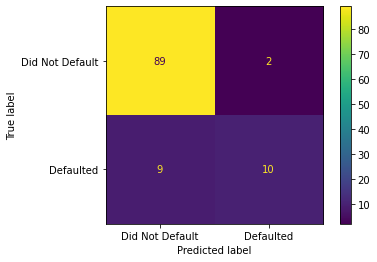

In [27]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

modelRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                 criterion='entropy', max_depth=None, max_features='auto',
                                 max_leaf_nodes=None, max_samples=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                 warm_start=False)

modelRF = modelRF.fit(x_train, y_train)

# Predict the model with test data set

y2_pred = modelRF.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y2_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y2_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y2_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y2_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelRF, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [28]:
# Results - predict vs actual values

Results2 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y2_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal2 = x_test_F1.merge(Results2, left_index=True, right_index=True)
ResultsFinal2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,0
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0


# Decision Tree Algorithm

[[75 16]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.87        91
           1       0.43      0.63      0.51        19

    accuracy                           0.79       110
   macro avg       0.67      0.73      0.69       110
weighted avg       0.83      0.79      0.81       110

Accuracy: 79.09 %
Precision: 42.86 %
Recall: 63.16 %
f1-score: 51.06 %
roc_auc_score: 0.728


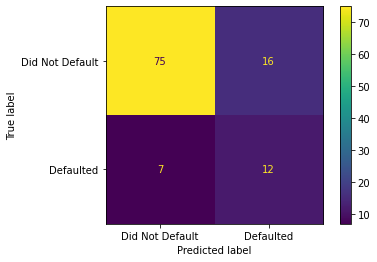

In [29]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

modelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                 max_depth=None, max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

modelDT = modelDT.fit(x_train,y_train)

# Predict with test data

y3_pred = modelDT.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y3_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y3_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y3_pred) * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y3_pred) * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelDT, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [30]:
# Results - predict vs actual values

Results3 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y3_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal3 = x_test_F1.merge(Results3, left_index=True, right_index=True)
ResultsFinal3.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,1
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0


# Logistic Regression Algorithm

[[88  3]
 [11  8]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        91
           1       0.73      0.42      0.53        19

    accuracy                           0.87       110
   macro avg       0.81      0.69      0.73       110
weighted avg       0.86      0.87      0.86       110

Accuracy: 87.27 %
Precision: 87.27 %
Recall: 87.27 %
f1-score: 87.27 %
roc_auc_score: 0.694


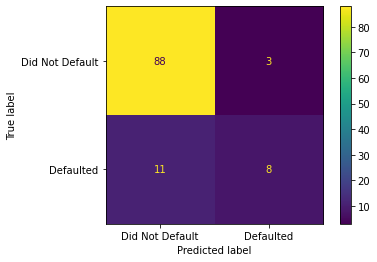

In [31]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                             intercept_scaling=1, max_iter=100, multi_class='auto', 
                             n_jobs=None, penalty='l2', random_state=None,
                             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y4_pred = modelLR.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y4_pred))
print(classification_report(y_test, y4_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y4_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y4_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y4_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y4_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelLR, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [32]:
# Results - predict vs actual values

Results4 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y4_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal4 = x_test_F1.merge(Results4, left_index=True, right_index=True)
ResultsFinal4.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,0
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0


# KNN Algorithm

[[88  3]
 [15  4]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        91
           1       0.57      0.21      0.31        19

    accuracy                           0.84       110
   macro avg       0.71      0.59      0.61       110
weighted avg       0.81      0.84      0.80       110

Accuracy: 83.64 %
Precision: 83.64 %
Recall: 83.64 %
f1-score: 83.64 %
roc_auc_score: 0.589


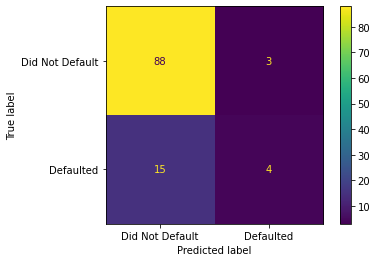

In [33]:
# To build the 'KNN' model 

from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

modelKNN = modelKNN.fit(x_train, y_train)

# Predict the model with test data set

y5_pred = modelKNN.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y5_pred))
print(classification_report(y_test, y5_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y5_pred) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y5_pred, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y5_pred, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y5_pred, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelKNN, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [34]:
# Results - predict vs actual values

Results5 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y5_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal5 = x_test_F1.merge(Results5, left_index=True, right_index=True)
ResultsFinal5.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,0
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0


# Gradient Boosting Algorithm

[[84  7]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        91
           1       0.65      0.68      0.67        19

    accuracy                           0.88       110
   macro avg       0.79      0.80      0.80       110
weighted avg       0.88      0.88      0.88       110

Accuracy: 88.18 %
Precision: 88.18 %
Recall: 88.18 %
f1-score: 88.18 %
roc_auc_score: 0.804


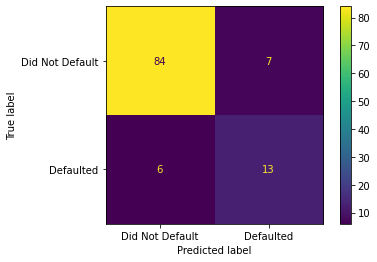

In [35]:
# To build the 'Gradient Boosting' model

from sklearn.ensemble import GradientBoostingClassifier

modelXGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                                      subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                      min_impurity_decrease=0.0, min_impurity_split=None, init=None,
                                      random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
                                      warm_start=False, validation_fraction=0.1, n_iter_no_change=None,
                                      tol=0.0001, ccp_alpha=0.0)

modelXGB = modelXGB.fit(x_train,y_train)

# Predict the model with test data set

y6_pred = modelXGB.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y6_pred))
print(classification_report(y_test, y6_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y6_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y6_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y6_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y6_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y6_pred), 3))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelXGB, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [36]:
# Results - predict vs actual values

Results6 = pd.DataFrame({'RainTomorrow':y_test, 'RainTomorrow_Pred':y6_pred})

# Merge two Dataframes on index of both the dataframes to view the test data with predicted values

ResultsFinal6 = x_test_F1.merge(Results6, left_index=True, right_index=True)
ResultsFinal6.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_Pred
365,12.3,30.2,0.0,6.0,12.6,0,78.0,0,0,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,0,0,0
116,11.5,25.9,0.0,5.2,10.2,0,44.0,0,0,9.0,...,35,1016.4,1014.3,6,2,15.8,24.3,0,0,0
61,13.6,34.2,0.0,8.8,12.8,0,35.0,0,0,2.0,...,20,1015.8,1011.6,7,6,21.9,31.8,0,0,0
325,4.7,19.5,0.0,10.0,11.0,0,46.0,0,0,13.0,...,25,1018.7,1015.1,1,0,14.5,18.3,0,0,0
100,10.4,20.9,0.0,4.0,8.9,0,33.0,0,0,15.0,...,51,1007.7,1006.8,6,6,13.8,18.7,0,0,0
